In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [9]:
session.query(Measurement.prcp, Measurement.date).all()

[(0.08, '2010-01-01'),
 (0.0, '2010-01-02'),
 (0.0, '2010-01-03'),
 (0.0, '2010-01-04'),
 (None, '2010-01-06'),
 (0.06, '2010-01-07'),
 (0.0, '2010-01-08'),
 (0.0, '2010-01-09'),
 (0.0, '2010-01-10'),
 (0.01, '2010-01-11'),
 (0.0, '2010-01-12'),
 (0.0, '2010-01-14'),
 (0.0, '2010-01-15'),
 (0.0, '2010-01-16'),
 (0.0, '2010-01-17'),
 (0.0, '2010-01-18'),
 (0.0, '2010-01-19'),
 (0.0, '2010-01-20'),
 (0.0, '2010-01-21'),
 (0.0, '2010-01-22'),
 (0.0, '2010-01-23'),
 (0.01, '2010-01-24'),
 (0.0, '2010-01-25'),
 (0.04, '2010-01-26'),
 (0.12, '2010-01-27'),
 (0.0, '2010-01-28'),
 (None, '2010-01-30'),
 (0.03, '2010-01-31'),
 (0.01, '2010-02-01'),
 (None, '2010-02-03'),
 (0.01, '2010-02-04'),
 (0.0, '2010-02-05'),
 (0.0, '2010-02-06'),
 (0.0, '2010-02-07'),
 (0.0, '2010-02-08'),
 (0.0, '2010-02-09'),
 (0.0, '2010-02-11'),
 (0.02, '2010-02-12'),
 (0.01, '2010-02-13'),
 (0.0, '2010-02-14'),
 (0.0, '2010-02-15'),
 (0.0, '2010-02-16'),
 (0.0, '2010-02-17'),
 (None, '2010-02-19'),
 (0.03, '2010-02-

In [10]:
f1=session.query(Measurement).first()
f1.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x18f31f23e90>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
from sqlalchemy import desc,asc
latest_date=session.query(Measurement.date).order_by(desc(Measurement.date)).first()
latest_date[0]



'2017-08-23'

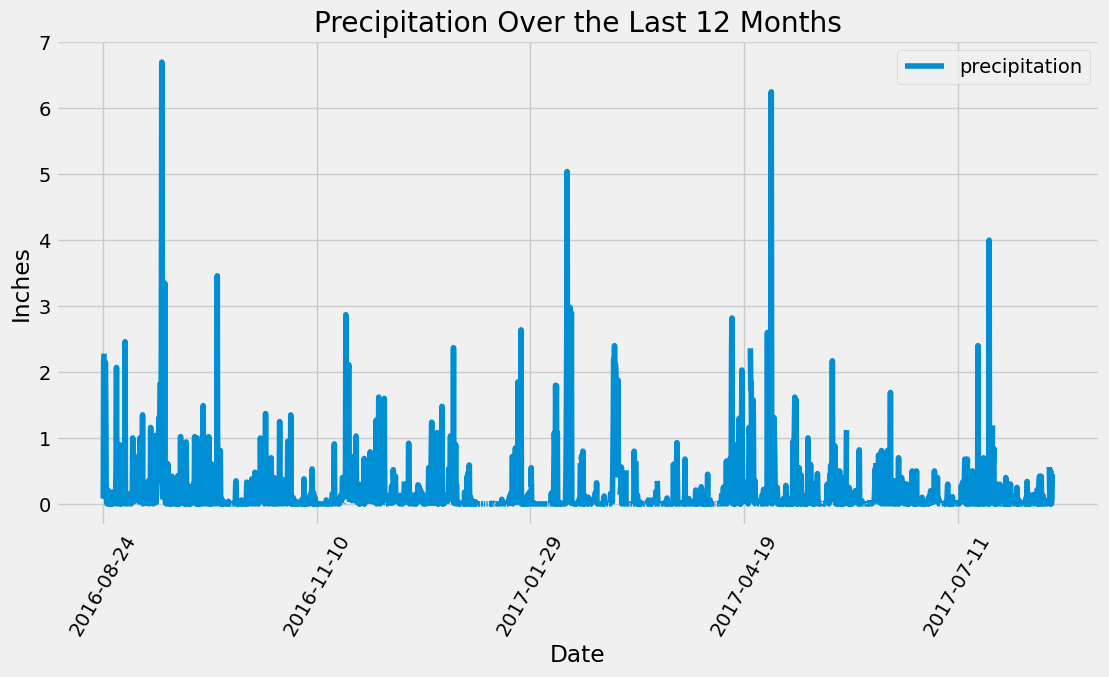

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date=session.query(Measurement.date).order_by(desc(Measurement.date)).first()
latest_date
# Calculate the date one year from the last date in data set.
#year_ago= dt.date(2017,8,23) - dt.timedelta(days=365)
#year_ago
year_ago=dt.datetime.strptime(latest_date[0], "%Y-%m-%d") - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).order_by(asc(Measurement.date)).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df=pd.DataFrame(precipitation_data,columns=['date','precipitation'])
prcp_df.set_index("date",inplace=True)

# Sort the dataframe by date
#prcp_df=prcp_df.groupby(["date"]).sum()
prcp_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot=60, figsize=(12,6))
plt.title("Precipitation Over the Last 12 Months")
plt.ylabel("Inches")
plt.xlabel("Date")
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
station_s=session.query(func.count(Station.station)).scalar()
station_s

9

In [16]:
session.query(Station.station).all()

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [15]:

station_data = session.query(Station.station).all()
    # Convert list of tuples into normal list
station_list = list(np.ravel(station_data))
station_list

['USC00519397',
 'USC00513117',
 'USC00514830',
 'USC00517948',
 'USC00518838',
 'USC00519523',
 'USC00519281',
 'USC00511918',
 'USC00516128']

In [119]:
session.query(Measurement.station,func.count(Measurement.station))\
    .group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [120]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_stations=session.query(Measurement.station,func.count(Measurement.station))\
    .group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()
for station, count in most_stations:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [121]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
    .filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

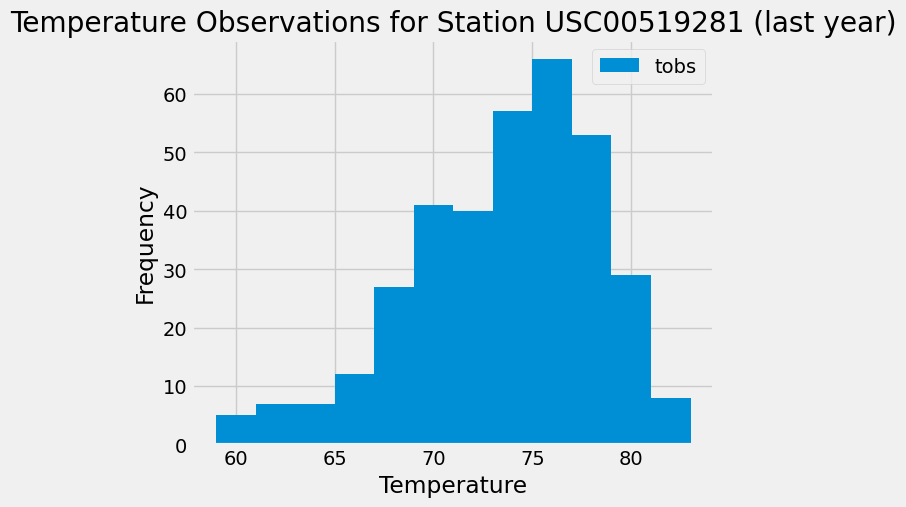

In [122]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_f=session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281')\
    .filter(Measurement.date >= year_ago).order_by(asc(Measurement.tobs)).all()
tobs_f
tobs_df=pd.DataFrame(tobs_f)
tobs_df.plot(kind='hist',figsize=(6,5),bins=12)
plt.title(f"Temperature Observations for Station USC00519281 (last year)")
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [123]:
# Close Session
session.close()